In [2]:
import numpy as np
import skrf.vi.vna
import skrf.network, skrf.calibration
from skrf.network import Network
import serial, dataclasses, os, time, itertools
import tqdm

matplotlib not found while setting up plotting


<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
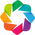

In [3]:
import numpy as np
import holoviews as hv
hv.extension('bokeh')
from bokeh.themes import built_in_themes
hv.renderer('bokeh').theme = built_in_themes['dark_minimal']

In [4]:
serial_port = serial.Serial(
            '/dev/ttyUSB0',
            4800,
            bytesize=8,
            parity='N',
            stopbits=1,
            timeout=0,
            rtscts=False)

In [ ]:
import time, tqdm
import skrf.vi.vna.keysight

ff = skrf.vi.vna.keysight.FieldFox('TCPIP0::192.168.68.65::inst0::INSTR')
ff.freq_start='300kHz'
ff.freq_stop='50GHz'
ff.npoints=10001
ff.if_bandwidth=1000

@dataclasses.dataclass
class AutocalStep:
    name     : str
    cmd      : str         # Serial command that puts the autocal into this state
    lname    : str = None  # Key to look up left (port 1) ideal in ACD
    rname    : str = None  # Key to look up right (port 2) ideal in ACD
    tname    : str = None  # Key to look up thru ideal in ACD
    measured : Network = None

autocal_steps = [
    AutocalStep(name='Short Short',   cmd='so1o2o3o4',  lname='Short.L', rname='Short.R'),
    AutocalStep(name='Open  Short',   cmd='so2o3o4',    lname='Open.L',  rname='Short.R'),
    AutocalStep(name='Short Open',    cmd='so1o2o4',    lname='Short.L', rname='Open.R'),
    AutocalStep(name='Load1 Short',   cmd='so3o4',      lname='Load1.L', rname='Short.R'),
    AutocalStep(name='Short Load1',   cmd='so1o4',      lname='Short.L', rname='Load1.R'),
    AutocalStep(name='Load2 Short',   cmd='so2o3',      lname='Load2.L', rname='Short.R'),
    AutocalStep(name='Short Load2',   cmd='so1o2',      lname='Short.L', rname='Load2.R'),
    AutocalStep(name='Load3 Short',   cmd='so3',        lname='Load3.L', rname='Short.R'),
    AutocalStep(name='Short Load3',   cmd='so1',        lname='Short.L', rname='Load3.R'),
    AutocalStep(name='Thru1',         cmd='so2o4',      tname='Thru1'),
    AutocalStep(name='Thru2',         cmd='so4',        tname='Thru2'),
    AutocalStep(name='Thru3',         cmd='so2',        tname='Thru3'),
    AutocalStep(name='Thru4',         cmd='s',          tname='Thru4')
]
autocal_nets = {}

t0 = time.time()
for i in range(1000):
    t = time.time()-t0
    for step in autocal_steps:
        print(f"drift03 {i=} {step.cmd} hours={t/3600:.3}")
        fname = f'dat/drift0_{int(i)}_{step.cmd}.s2p'
        if os.path.exists(fname):
            print('!!! FILE EXISTS !!!')
            continue
        serial_port.write(bytes(step.cmd,'utf8'))
        net = ff.get_snp_network(ports=(1,2))
        net.write_touchstone(filename=fname)
        autocal_nets[step.cmd] = net

drift02 i=0 so1o2o3o4 hours=3.09e-08
drift02 i=0 so2o3o4 hours=3.09e-08
drift02 i=0 so1o2o4 hours=3.09e-08
drift02 i=0 so3o4 hours=3.09e-08
drift02 i=0 so1o4 hours=3.09e-08
drift02 i=0 so2o3 hours=3.09e-08
drift02 i=0 so1o2 hours=3.09e-08
drift02 i=0 so3 hours=3.09e-08
drift02 i=0 so1 hours=3.09e-08
drift02 i=0 so2o4 hours=3.09e-08
drift02 i=0 so4 hours=3.09e-08
drift02 i=0 so2 hours=3.09e-08
drift02 i=0 s hours=3.09e-08
drift02 i=1 so1o2o3o4 hours=0.262
drift02 i=1 so2o3o4 hours=0.262
drift02 i=1 so1o2o4 hours=0.262
drift02 i=1 so3o4 hours=0.262
drift02 i=1 so1o4 hours=0.262
drift02 i=1 so2o3 hours=0.262
drift02 i=1 so1o2 hours=0.262
drift02 i=1 so3 hours=0.262
drift02 i=1 so1 hours=0.262
drift02 i=1 so2o4 hours=0.262
drift02 i=1 so4 hours=0.262
drift02 i=1 so2 hours=0.262
drift02 i=1 s hours=0.262
drift02 i=2 so1o2o3o4 hours=0.523
drift02 i=2 so2o3o4 hours=0.523
drift02 i=2 so1o2o4 hours=0.523
drift02 i=2 so3o4 hours=0.523
drift02 i=2 so1o4 hours=0.523
drift02 i=2 so2o3 hours=0.523
d

In [17]:
fname = f'dat/drift01_85056_p12R.s1p'
serial_port.write(bytes(step.cmd,'utf8'))
net = ff.get_snp_network(ports=(1,2))
net.write_touchstone(filename=fname)